<a href="https://colab.research.google.com/github/prat19-ux/Monkeytypebot/blob/main/health_care_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
**Part 1 - SVM, ANN Model**



In [ ]:
#Mounting the folders from google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Basic Imports 
import csv
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


#Reading the csv 
x=[]
y=[]
with open("/content/gdrive/MyDrive/resources_projects/diabetes/diabetes.csv") as f:
  read = csv.reader(f)
  cnt=0
  for i in read:
    if cnt!=0:
      value = [float(x) for x in i]
      x.append(value[:-1])
      y.append(value[-1])
    cnt+=1

x = np.array(x) 
y = np.array(y)


#Making our model
model = svm.SVC(kernel="linear", C=7, gamma = 7)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)


#Checking our accuracy!
print(accuracy_score(pred, y_test))

#vary hyperparameters and verify (tabulate findings)

0.7402597402597403


In [ ]:
#ANN model for same

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

diabetes = pd.read_csv("/content/gdrive/MyDrive/resources_projects/diabetes/diabetes.csv")
diabetes.head()

x = diabetes.drop(columns=["Outcome"])
y = diabetes['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

#Standardizing the data
sc = StandardScaler()
sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

#Making the model
sknet = MLPClassifier(hidden_layer_sizes3=(), learning_rate_init=0.1, max_iter=2000)
sknet
sknet.fit(x_train, y_train)
pred = sknet.predict(x_test)

#Checking our (improved) accuracy
print(accuracy_score(pred, y_test))


#vary hyperparameters and verify (tabulate findings)

0.7662337662337663


** *italicized text*Part** **2 - CNN Classifier**

In [ ]:
#Basic Imports 

import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import plotly.express as px
import numpy as np
from PIL import Image


In [ ]:
#Defining our directories

TRAINING_BACTERIA_DIR = "/content/gdrive/MyDrive/resources_projects/cnn_classifier/train_data/bacteria_chest_xray"
TRAINING_NORMAL_DIR = "/content/gdrive/MyDrive/resources_projects/cnn_classifier/train_data/normal_chest_xray/"

TESTING_BACTERIA_DIR = "/content/gdrive/MyDrive/resources_projects/cnn_classifier/test_data/bacteria_chest_xray"
TESTING_NORMAL_DIR = "/content/gdrive/MyDrive/resources_projects/cnn_classifier/test_data/normal_chest_xray"

VALIDATION_NORMAL_DIR = "/content/gdrive/MyDrive/resources_projects/cnn_classifier/validation_data/normal_chest_xray/"
VALIDATION_BACTERIA_DIR = "/content/gdrive/MyDrive/resources_projects/cnn_classifier/validation_data/bacteria_chest_xray/"



In [ ]:
#Checking if all images are in their place

print(len(os.listdir(TRAINING_BACTERIA_DIR)))
print(len(os.listdir(TRAINING_NORMAL_DIR)))

print(len(os.listdir(VALIDATION_BACTERIA_DIR)))
print(len(os.listdir(VALIDATION_NORMAL_DIR)))

print(len(os.listdir(TESTING_BACTERIA_DIR)))
print(len(os.listdir(TESTING_NORMAL_DIR)))

90
90
10
10
25
25


In [ ]:
#Making our CNN model

#add more layers 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid'), 

])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])


In [ ]:

TRAINING_DIR = "/content/gdrive/MyDrive/resources_projects/cnn_classifier/train_data"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10, 
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/content/gdrive/MyDrive/resources_projects/cnn_classifier/validation_data" 
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=10,
                                                              class_mode='binary',
                                                              target_size=(150, 150))


Found 180 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
# Training the data
# trial and error to get best accuracy

history = model.fit(train_generator, epochs=5, steps_per_epoch=18,
                    validation_data=validation_generator, validation_steps=2)

Epoch 1/5
18/18 [==============================] - 5s 220ms/step - loss: 0.8946 - acc: 0.4556 - val_loss: 0.6645 - val_acc: 0.5500
Epoch 2/5
18/18 [==============================] - 4s 198ms/step - loss: 0.7681 - acc: 0.5944 - val_loss: 0.5295 - val_acc: 1.0000
Epoch 3/5
18/18 [==============================] - 4s 195ms/step - loss: 0.5276 - acc: 0.8000 - val_loss: 0.5096 - val_acc: 0.6500
Epoch 4/5
18/18 [==============================] - 4s 200ms/step - loss: 0.3156 - acc: 0.8667 - val_loss: 0.0357 - val_acc: 1.0000
Epoch 5/5
18/18 [==============================] - 4s 200ms/step - loss: 0.3081 - acc: 0.8889 - val_loss: 0.0259 - val_acc: 1.0000


<Figure size 432x288 with 0 Axes>

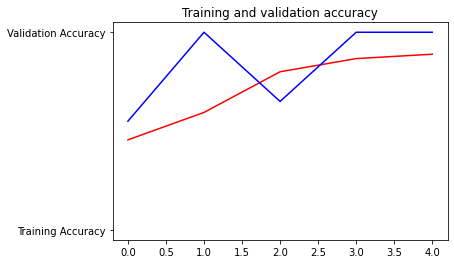

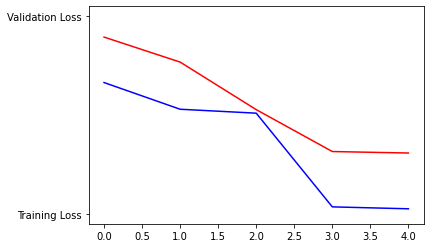

<Figure size 432x288 with 0 Axes>

In [ ]:
#Graphical representation of our model's performance

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data sets for each training epoch
#-----------------------------------------------------------

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

#find each class mean what

In [ ]:
# Confusion Matrix

import numpy as np
from google.colab import files
from keras.preprocessing import image
from tabulate import tabulate

def test_func(dir):
  table=[["Image", "Actual", "Predicted",  "Classes[0]"], ["", "", "", "", ""]]
  if dir == '/content/gdrive/MyDrive/resources_projects/cnn_classifier/test_data/bacteria_chest_xray':
    ans = "Bacterial"
  else:
    ans="Normal"

  count_normal = 0
  count_bacteria=0
  cnt=0
  counting=0
  for file in os.listdir(dir):
    if file.endswith('.jpeg'):
     
      path = dir + "/" + os.path.join(file)
      img = image.load_img(path, target_size=(150, 150))
      if counting<4:       
        plt.imshow(img)
      counting+=1
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)

      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      plt.show(img)
      ans1=""
      if classes[0]>0.5:
        count_normal+=1
        ans1="Normal"
      else:   
        count_bacteria+=1
        ans1 = "Bacterial"
      rounded = str(round(classes[0][0], 4))
      lists=[os.path.join(file), ans, ans1, rounded[:6]]
      table.append(lists)
      cnt+=1
  print(tabulate(table))
  if dir == '/content/gdrive/MyDrive/resources_projects/cnn_classifier/test_data/bacteria_chest_xray':
    print(count_bacteria/cnt)
  else:
    print(count_normal/cnt)

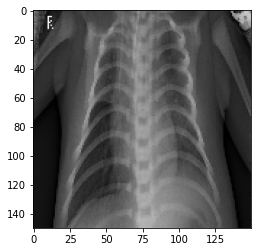

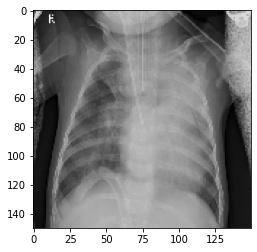

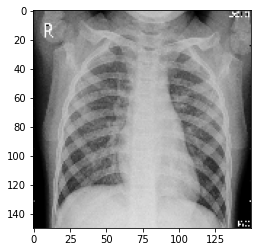

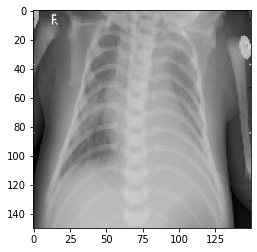

--------------------------  ---------  ---------  ----------
Image                       Actual     Predicted  Classes[0]

person81_bacteria_396.jpeg  Bacterial  Bacterial  0.0
person83_bacteria_409.jpeg  Bacterial  Bacterial  0.0
person79_virus_148.jpeg     Bacterial  Normal     1.0
person81_bacteria_398.jpeg  Bacterial  Bacterial  0.0
person78_virus_140.jpeg     Bacterial  Normal     0.6236
person78_bacteria_384.jpeg  Bacterial  Bacterial  0.0
person78_bacteria_385.jpeg  Bacterial  Bacterial  0.0
person82_bacteria_404.jpeg  Bacterial  Bacterial  0.0
person81_bacteria_395.jpeg  Bacterial  Bacterial  0.0
person78_bacteria_387.jpeg  Bacterial  Bacterial  0.0832
person80_bacteria_393.jpeg  Bacterial  Normal     0.5408
person78_bacteria_381.jpeg  Bacterial  Bacterial  0.0
person80_bacteria_391.jpeg  Bacterial  Bacterial  0.0
person78_bacteria_386.jpeg  Bacterial  Bacterial  0.0
person82_bacteria_402.jpeg  Bacterial  Bacterial  0.0
person81_bacteria_397.jpeg  Bacterial  Bacterial  0.0
pers

In [ ]:
print(test_func(TESTING_BACTERIA_DIR))

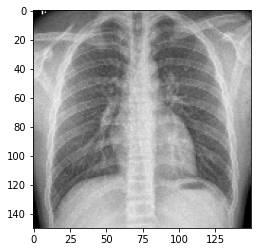

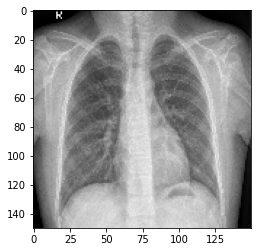

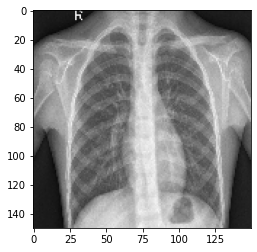

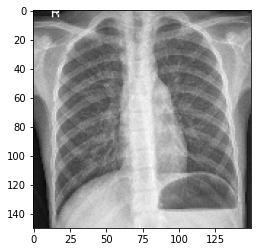

----------------------  ------  ---------  ----------
Image                   Actual  Predicted  Classes[0]

IM-0029-0001.jpeg       Normal  Normal     1.0
IM-0027-0001.jpeg       Normal  Bacterial  0.0028
IM-0001-0001.jpeg       Normal  Normal     1.0
IM-0033-0001.jpeg       Normal  Normal     1.0
IM-0011-0001-0002.jpeg  Normal  Normal     1.0
IM-0023-0001.jpeg       Normal  Normal     0.8513
IM-0003-0001.jpeg       Normal  Normal     1.0
IM-0019-0001.jpeg       Normal  Normal     1.0
IM-0025-0001.jpeg       Normal  Normal     1.0
IM-0016-0001.jpeg       Normal  Normal     0.9999
IM-0013-0001.jpeg       Normal  Normal     1.0
IM-0031-0001.jpeg       Normal  Normal     1.0
IM-0009-0001.jpeg       Normal  Normal     1.0
IM-0005-0001.jpeg       Normal  Bacterial  0.0
IM-0015-0001.jpeg       Normal  Normal     0.9999
IM-0030-0001.jpeg       Normal  Normal     1.0
IM-0010-0001.jpeg       Normal  Normal     1.0
IM-0017-0001.jpeg       Normal  Normal     1.0
IM-0006-0001.jpeg       Normal  N

In [ ]:
print(test_func(TESTING_NORMAL_DIR))

In [ ]:
#Upload

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
# os.mkdir('/content/uploaded_images') 

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a bacterial chest")
  else:
    print(fn + " is a normal chest")   

Saving download.jfif to download.jfif
Saving he.jpg to he.jpg
Saving images.jfif to images.jfif
Saving no.png to no.png
Saving pn.jpeg to pn.jpeg
Saving vi.png to vi.png
[0.34536228]
download.jfif is a bacterial chest
[0.99999774]
he.jpg is a normal chest
[0.99999774]
images.jfif is a normal chest
[0.9999974]
no.png is a normal chest
[0.9880117]
pn.jpeg is a normal chest
[0.9999974]
vi.png is a normal chest


In [ ]:
#1 Show the architecture of the model
#2 Tabulation of different hyperparamters
#3 Qualitative output
#4 Quantitative output (confusion matrix)